<a href="https://colab.research.google.com/github/NoshinSayara/Breast-Cancer-Classification/blob/main/cse422_Group09_sec06_(1)project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
dataset = sklearn.datasets.load_breast_cancer()
data_frame = pd.read_csv("/content/data.csv")

In [ ]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data_frame.shape

(575, 33)

In [ ]:
data_frame.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  1
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       1
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               1
concavity_se                 1
concave points_se            0
symmetry_se                  0
fractal_dimension_se         1
radius_worst                 1
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      1
Unnamed:

In [ ]:
data_frame = data_frame.drop(['Unnamed: 32'],axis = 1)
data_frame = data_frame.dropna(axis = 0, subset = ['fractal_dimension_worst','radius_worst','fractal_dimension_se','concavity_se','compactness_se','fractal_dimension_mean','compactness_mean','radius_mean'])
data_frame.shape

(569, 32)

In [ ]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame['label'] = dataset.target
data_frame.shape

(569, 33)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data_frame.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
label                      0
dtype: int64

In [ ]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

0 --- Benign

1 --- Malignant


In [ ]:
data_frame.groupby('label').mean()

<ipython-input-164-05bd2fb6f748>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_frame.groupby('label').mean()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
label,,,,,,,,,,,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
x_data_frame = data_frame.drop(columns = 'label', axis = 1)
y_data_frame = data_frame['label']

In [ ]:
print(x_data_frame)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
print(y_data_frame)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


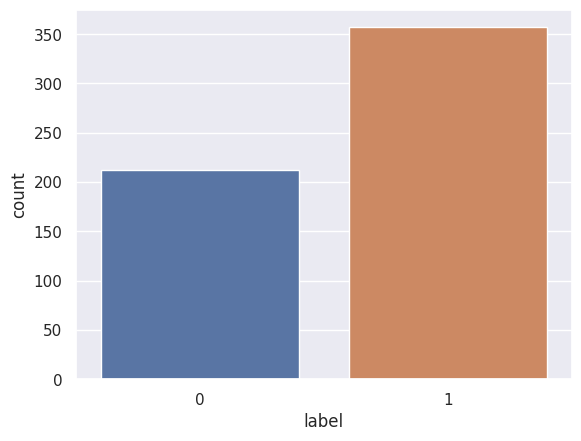

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = data_frame['label'], label = 'count')
plt.show()

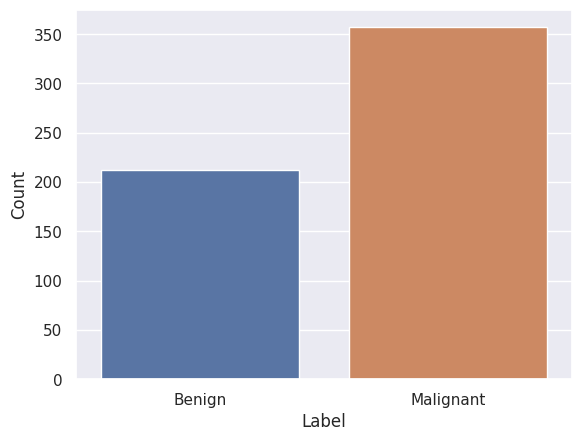

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

ax = sns.countplot(x=data_frame['label'])

ax.set_xticklabels(['Benign', 'Malignant'])

ax.set(xlabel='Label', ylabel='Count')

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_label = LabelEncoder()

data_frame.iloc[:,1] = labelencoder_label.fit_transform(data_frame.iloc[:,1].values)

<ipython-input-170-387d35b40015>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.iloc[:,1] = labelencoder_label.fit_transform(data_frame.iloc[:,1].values)


In [ ]:
data_frame.iloc[:,1].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

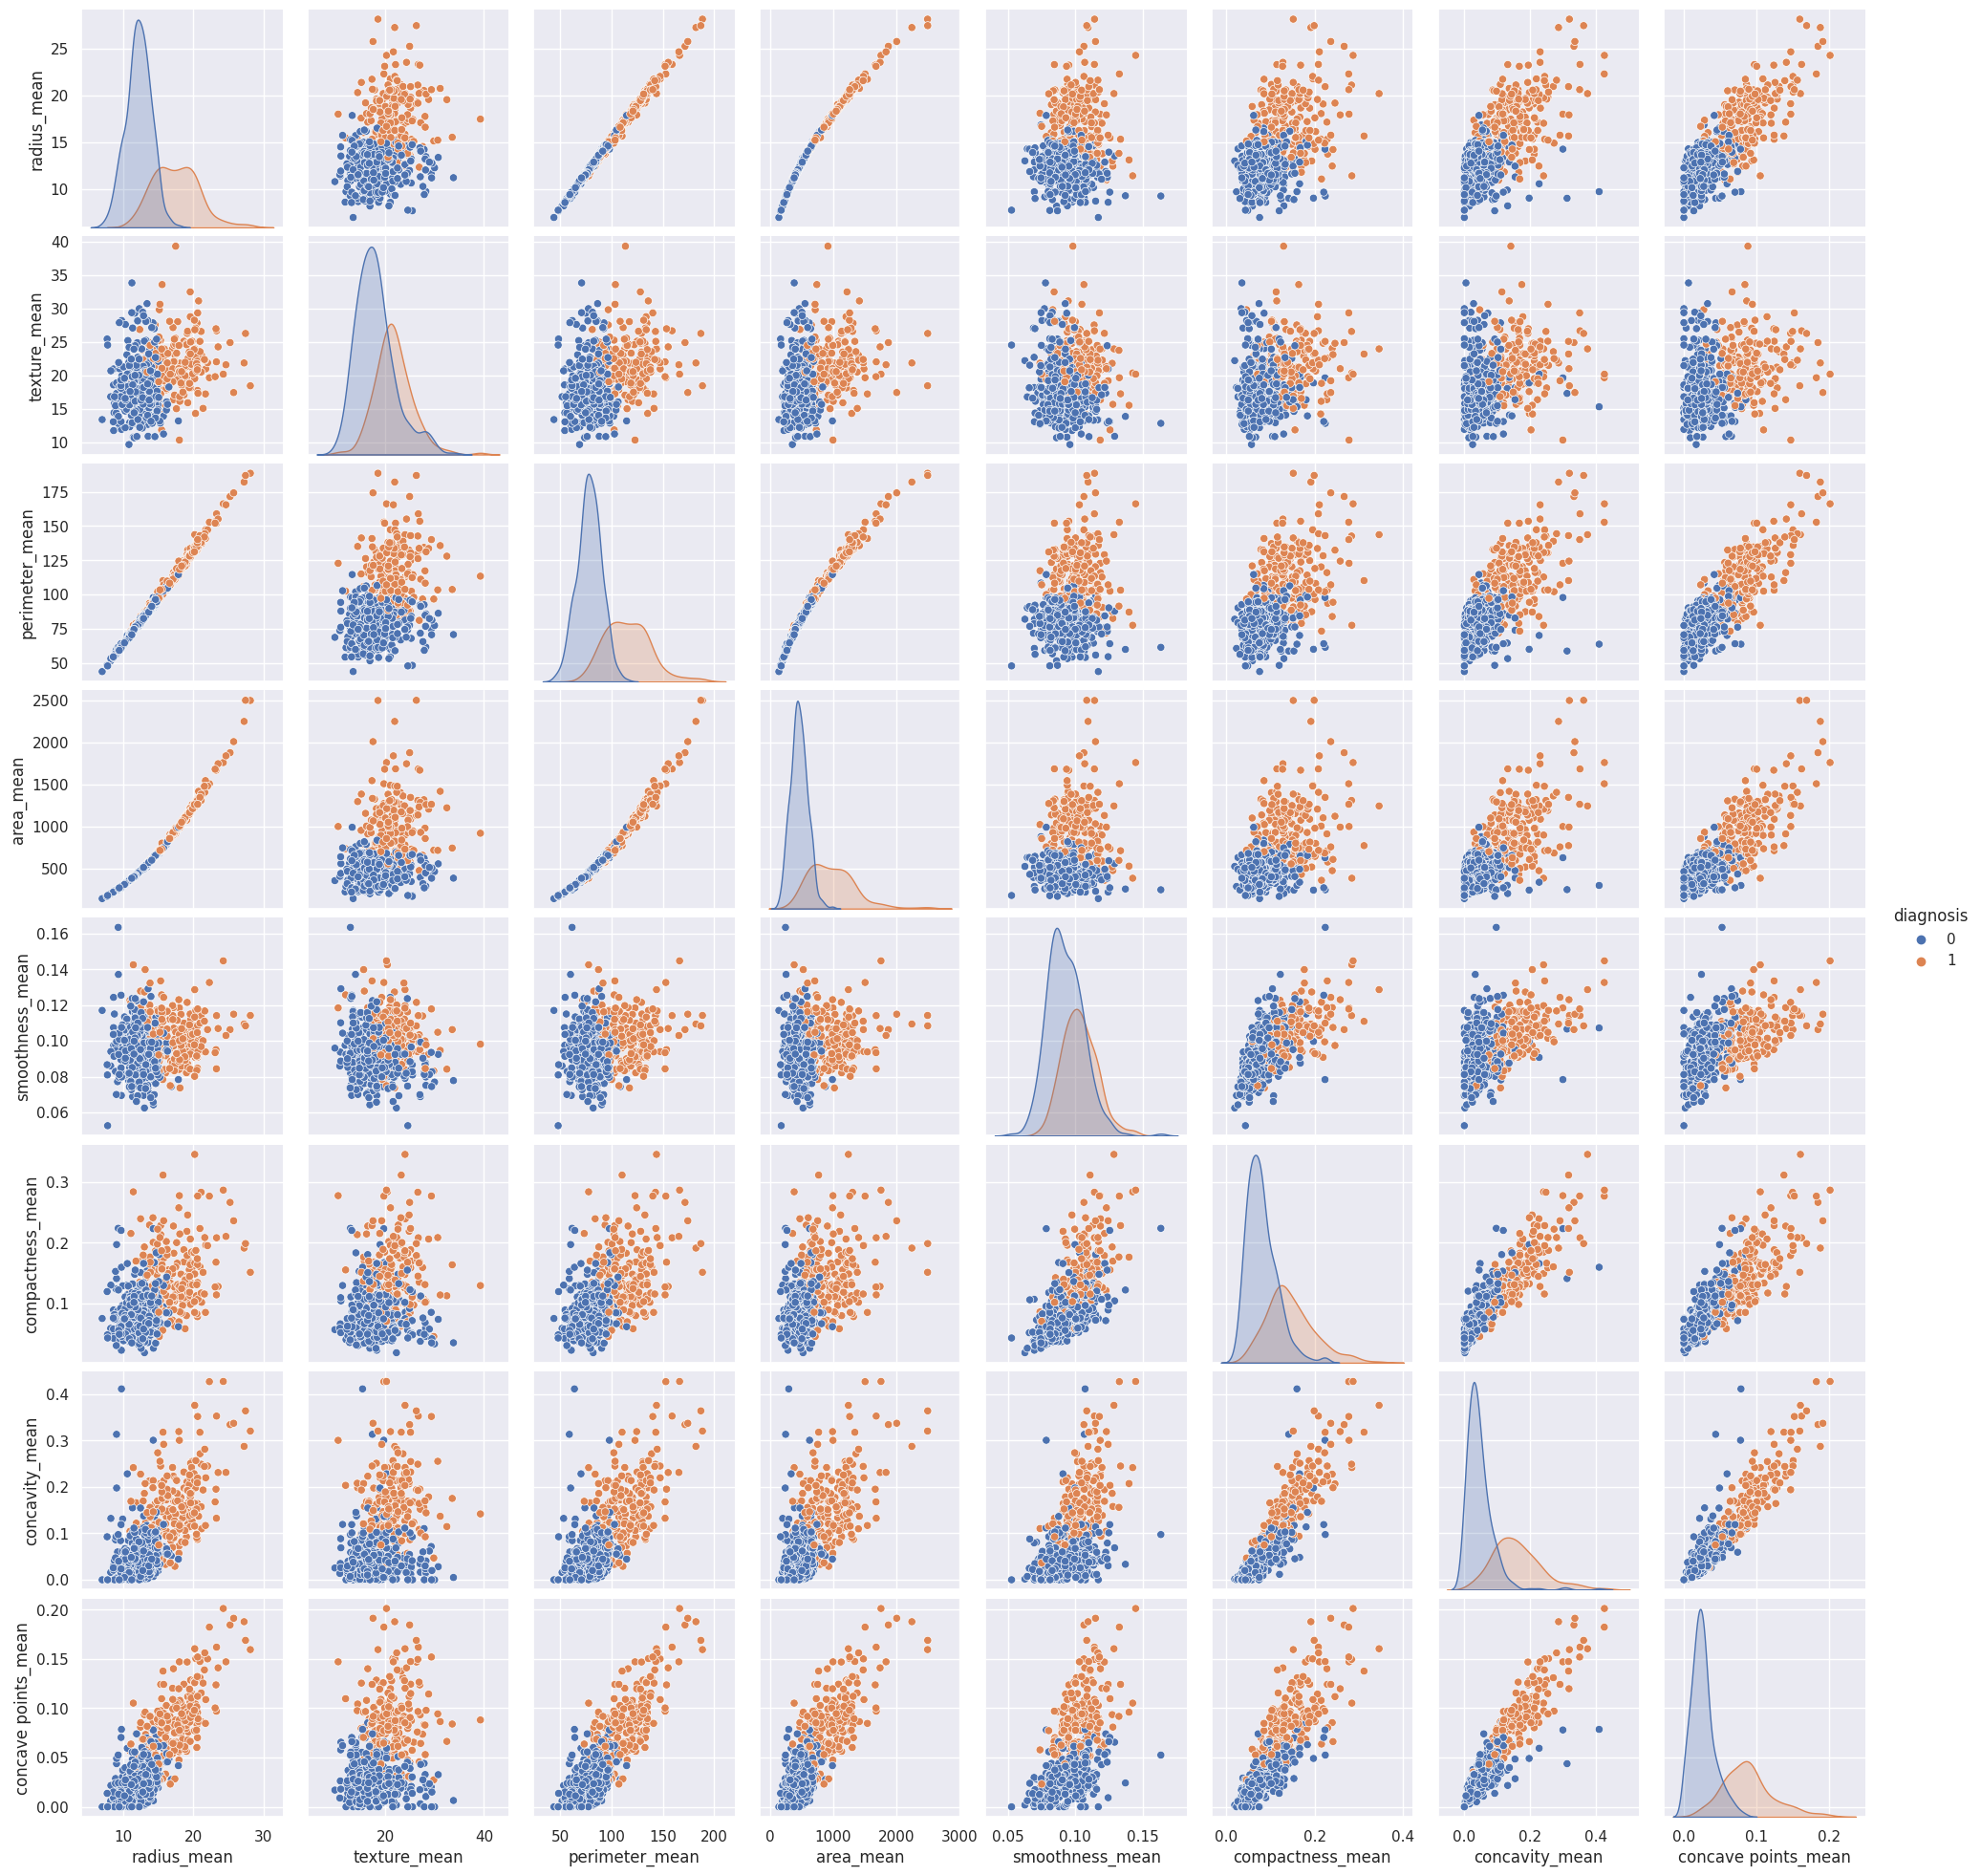

In [ ]:
sns.pairplot(data_frame.iloc[:,1:10], hue = 'diagnosis')
plt.show()

In [ ]:
data_frame.iloc[:,1:25].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169


<Axes: >

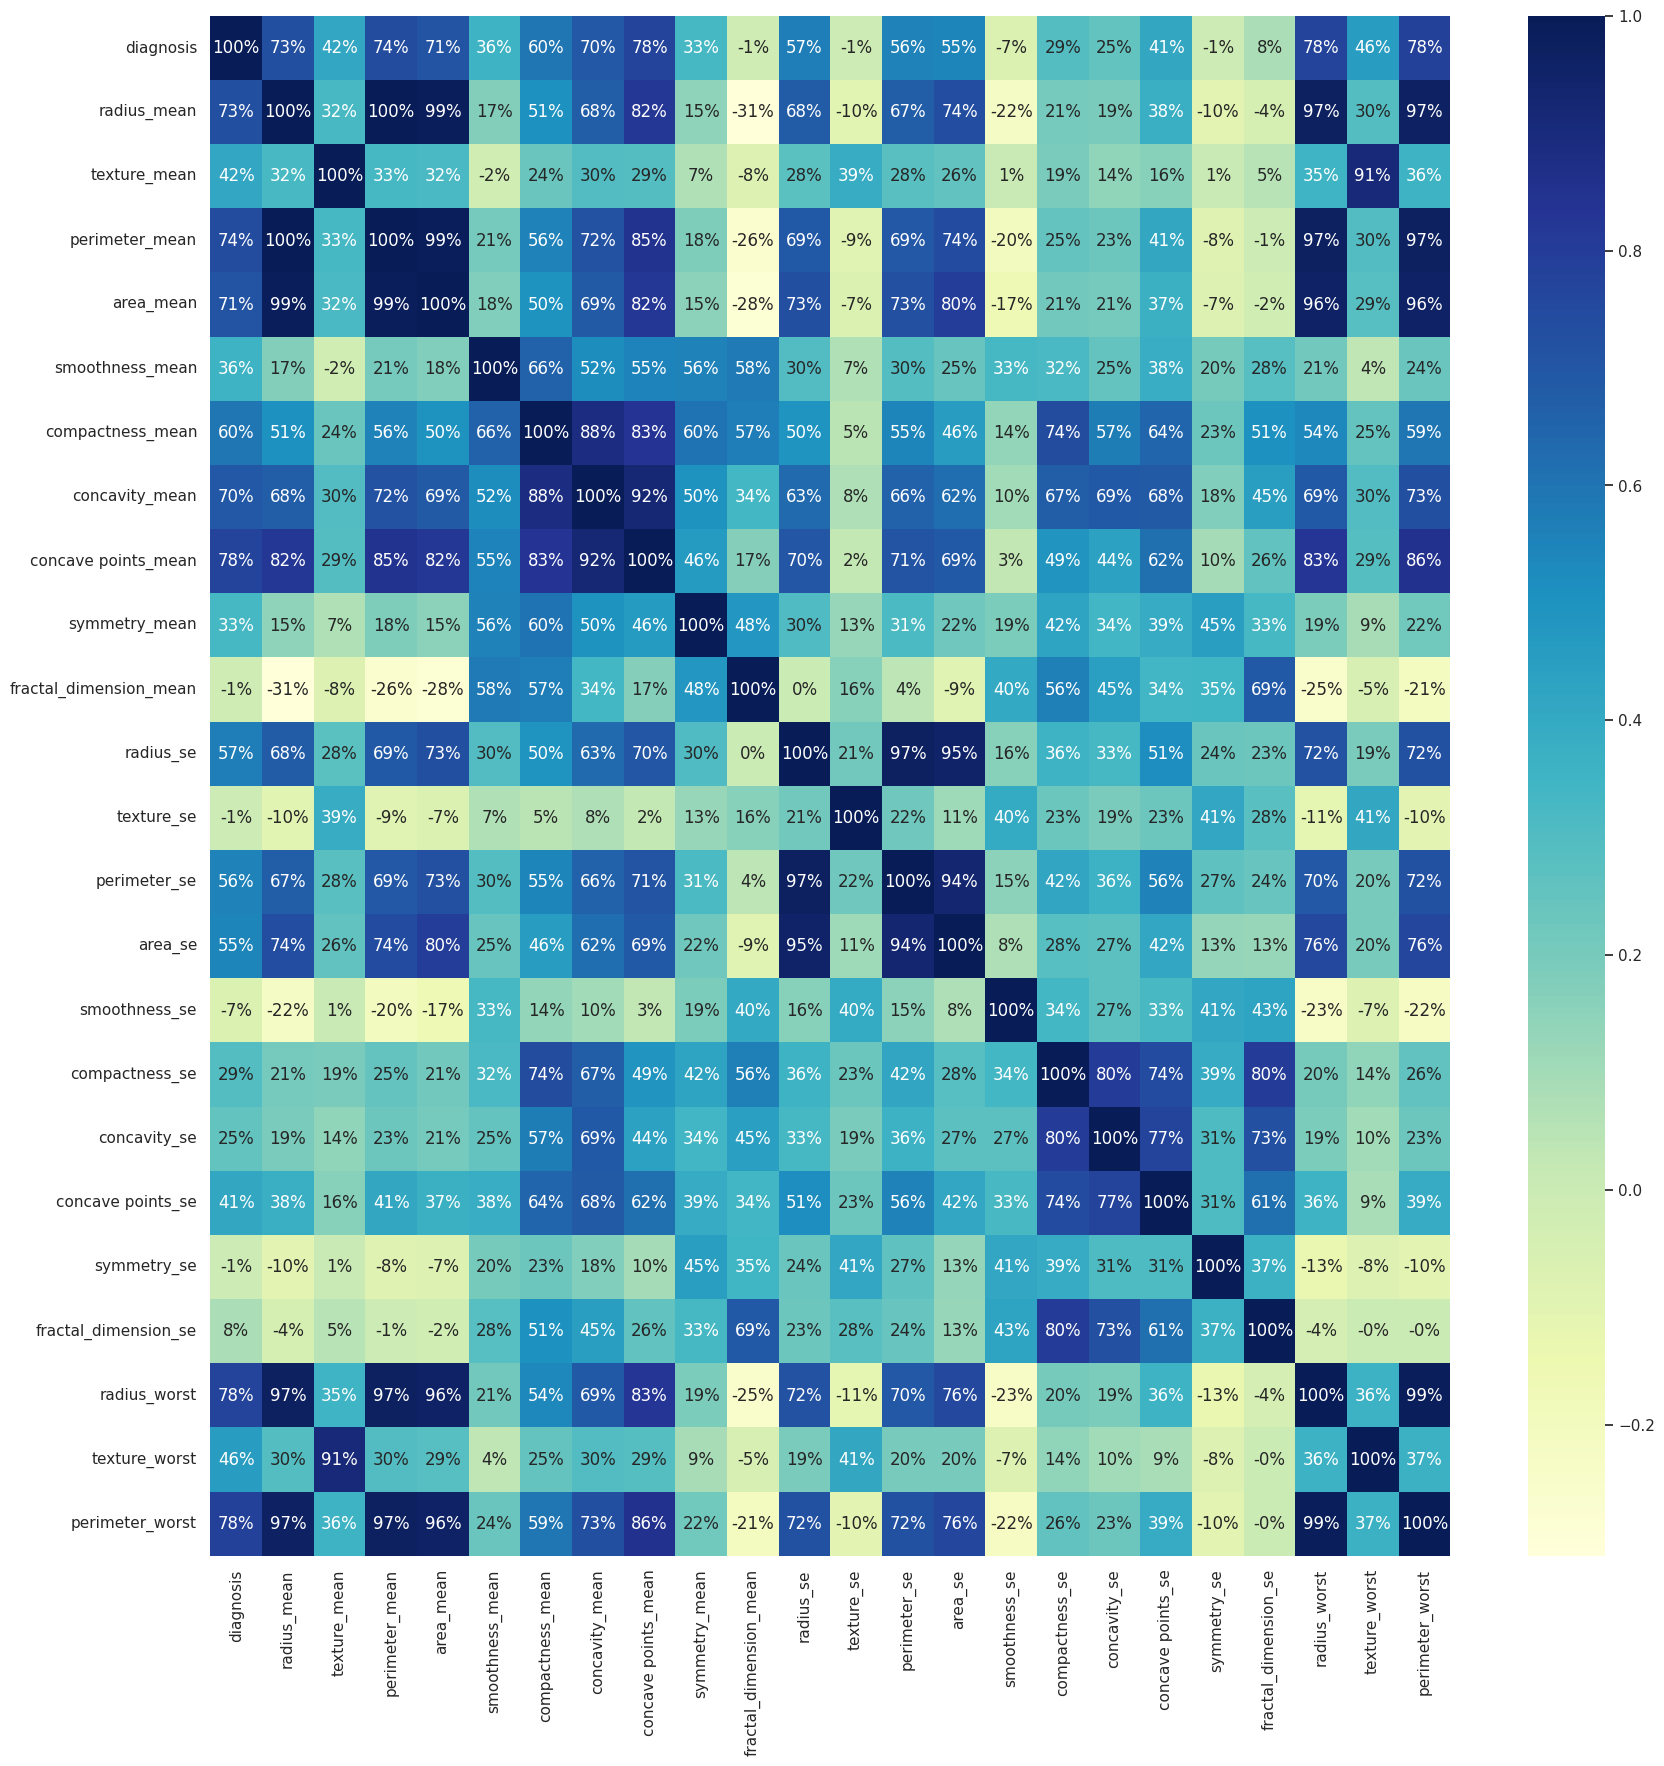

In [ ]:
plt.figure(figsize= (20,20))
sns.heatmap(data_frame.iloc[:,1:25].corr(),cmap = "YlGnBu",annot = True, fmt = '.0%')

In [ ]:
x_data_frame = data_frame.iloc[:,2:31].values
y_data_frame = data_frame.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_test , y_train , y_test = train_test_split(x_data_frame, y_data_frame, test_size = 0.30, random_state = 0)
x_train, x_test , y_train , y_test = train_test_split(x_data_frame, y_data_frame, test_size = 0.30, stratify= y_data_frame, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
x_train = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Logistic Regression

def logistic_model(x_train, y_train):
  log = LogisticRegression(random_state=0)
  log.fit(x_train, y_train)
  return log

#Decision Tree

def decision_tree_model(x_train, y_train):
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(x_train, y_train)
  return tree

#Random Forest

def random_forest_model(x_train, y_train):
  forest = RandomForestClassifier(random_state=0)
  forest.fit(x_train, y_train)
  return forest

#Nearest Neighbor algorithm

# def KNeighborsClassifier(x_train, y_train):
#   knn = KNeighborsClassifier(n_neighbors=5)
#   knn.fit(x_train, y_train)
#   return knn

# Naive Bayes

def naive_bayes(x_train, y_train):
  nb = GaussianNB()
  nb.fit(x_train, y_train)
  return nb

# SVM (linear)

def svm(x_train, y_train):
  svc = SVC(kernel = 'linear', random_state = 0)
  svc.fit(x_train, y_train)
  return svc


logistic_model = logistic_model(x_train, y_train)
decision_tree_model = decision_tree_model(x_train, y_train)
random_forest_model = random_forest_model(x_train, y_train)
svc_model = svm(x_train, y_train)
naive_bayes_model = naive_bayes(x_train, y_train)
#KNeighborsClassifier_model = KNeighborsClassifier(x_train, y_train)


logistic_accuracy = logistic_model.score(x_test, y_test)
decision_tree_accuracy = decision_tree_model.score(x_test, y_test)
random_forest_accuracy = random_forest_model.score(x_test, y_test)
svc_accuracy = svc_model.score(x_test, y_test)
naive_bayes_accuracy = naive_bayes_model.score(x_test, y_test)
#KNeighborsClassifier_accuracy = KNeighborsClassifier_model.score(x_train, y_train)

print("The accuracy of Logistic Regression ", logistic_accuracy)
print("The accuracy of Decision Tree ", decision_tree_accuracy)
print("The accuracy of Random Forest Classifier ",random_forest_accuracy)
print("The accuracy of Linear Support Vector Machine ",svc_accuracy)
print("The accuracy of Naive Bayes Algorithm ",naive_bayes_accuracy)
#print("The accuracy of KNeighborsClassifier ", KNeighborsClassifier_accuracy )

The accuracy of Logistic Regression  0.9532163742690059
The accuracy of Decision Tree  0.9181286549707602
The accuracy of Random Forest Classifier  0.9473684210526315
The accuracy of Linear Support Vector Machine  0.9415204678362573
The accuracy of Naive Bayes Algorithm  0.9064327485380117


Logistic Regression Confusion Matrix:
[[103   4]
 [  4  60]]
Logistic Regression Accuracy: 0.9532163742690059


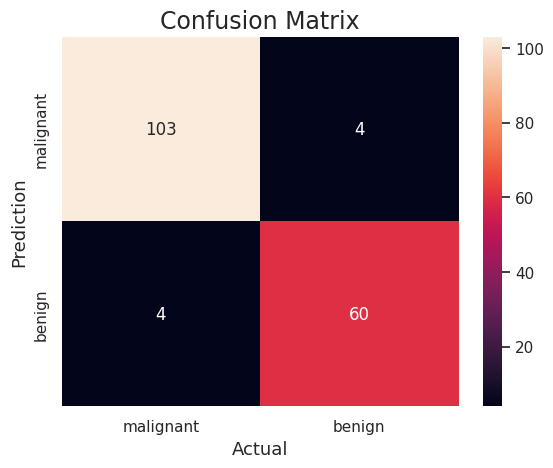

Accuracy   : 0.9532163742690059
Precision : 0.9375
Recall    : 0.9375
F1-score  : 0.9375


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#logistic regression confusion matrix

logistic_cm = confusion_matrix(y_test, logistic_model.predict(x_test))

logistic_tp = logistic_cm[0][0]

logistic_tn = logistic_cm[1][1]

logistic_fn =  logistic_cm[1][0]

logistic_fp = logistic_cm[0][1]

logistic_accuracy = (logistic_tp+ logistic_tn)/ (logistic_tp+ logistic_tn + logistic_fp + logistic_fn)

print("Logistic Regression Confusion Matrix:")

print(logistic_cm)

print("Logistic Regression Accuracy:", logistic_accuracy)

sns.heatmap(logistic_cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, logistic_model.predict(x_test))
print("Accuracy   :", accuracy)
precision = precision_score(y_test, logistic_model.predict(x_test))
print("Precision :", precision)
recall = recall_score(y_test, logistic_model.predict(x_test))
print("Recall    :", recall)
F1_score = f1_score(y_test, logistic_model.predict(x_test))
print("F1-score  :", F1_score)

Decision Tree Confusion Matrix:
[[98  9]
 [ 5 59]]
Decision Tree Accuracy: 0.9181286549707602


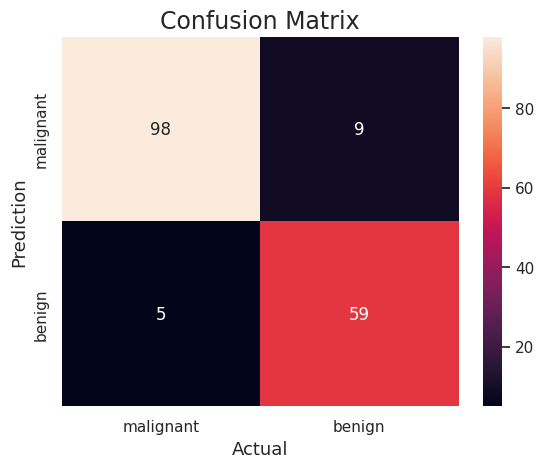

Accuracy   : 0.9181286549707602
Precision : 0.8676470588235294
Recall    : 0.921875
F1-score  : 0.893939393939394


In [ ]:
#Decision tree confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree_cm =  confusion_matrix(y_test, decision_tree_model.predict(x_test))


decision_tree_tp =  decision_tree_cm[0][0]

decision_tree_tn  = decision_tree_cm[1][1]

decision_tree_fn = decision_tree_cm[1][0]

decision_tree_fp = decision_tree_cm[0][1]

decision_tree_accuracy = (decision_tree_tp + decision_tree_tn) / (decision_tree_tp + decision_tree_tn + decision_tree_fp + decision_tree_fn)

print("Decision Tree Confusion Matrix:")

print (decision_tree_cm)

print("Decision Tree Accuracy:",decision_tree_accuracy)

sns.heatmap(decision_tree_cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, decision_tree_model.predict(x_test))
print("Accuracy   :", accuracy)
precision = precision_score(y_test, decision_tree_model.predict(x_test))
print("Precision :", precision)
recall = recall_score(y_test, decision_tree_model.predict(x_test))
print("Recall    :", recall)
F1_score = f1_score(y_test, decision_tree_model.predict(x_test))
print("F1-score  :", F1_score)

Random Forest Confusion Matrix:
[[100   7]
 [  2  62]]
Random Forest Accuracy: 0.9473684210526315


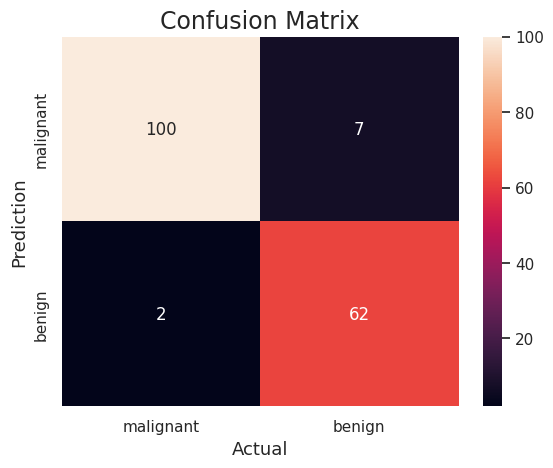

Accuracy   : 0.9473684210526315
Precision : 0.8985507246376812
Recall    : 0.96875
F1-score  : 0.9323308270676692


In [ ]:
# random forests confusion matrix

random_forest_cm = confusion_matrix(y_test, random_forest_model.predict(x_test))

random_forest_tp = random_forest_cm[0][0]

random_forest_tn = random_forest_cm[1][1]

random_forest_fn = random_forest_cm[1][0 ]

random_forest_fp = random_forest_cm[0][1]

random_forest_accuracy = (random_forest_tp + random_forest_tn) / (random_forest_tp + random_forest_tn + random_forest_fp + random_forest_fn)


print("Random Forest Confusion Matrix:")

print(random_forest_cm)

print("Random Forest Accuracy:", random_forest_accuracy)
sns.heatmap(random_forest_cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, random_forest_model.predict(x_test))
print("Accuracy   :", accuracy)
precision = precision_score(y_test, random_forest_model.predict(x_test))
print("Precision :", precision)
recall = recall_score(y_test, random_forest_model.predict(x_test))
print("Recall    :", recall)
F1_score = f1_score(y_test, random_forest_model.predict(x_test))
print("F1-score  :", F1_score)

Naive Bayes Confusion Matrix:
[[97 10]
 [ 6 58]]
Naive Bayes Accuracy: 0.9064327485380117


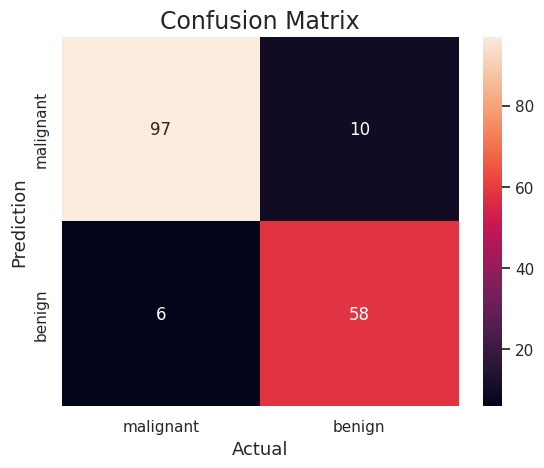

Accuracy   : 0.9064327485380117
Precision : 0.8529411764705882
Recall    : 0.90625
F1-score  : 0.8787878787878787


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#logistic regression confusion matrix

naive_bayes_cm = confusion_matrix(y_test, naive_bayes_model.predict(x_test))

naive_bayes_tp = naive_bayes_cm[0][0]

naive_bayes_tn = naive_bayes_cm[1][1]

naive_bayes_fn =  naive_bayes_cm[1][0]

naive_bayes_fp = naive_bayes_cm[0][1]

naive_bayes_accuracy = (naive_bayes_tp+ naive_bayes_tn)/ (naive_bayes_tp+ naive_bayes_tn + naive_bayes_fp + naive_bayes_fn)

print("Naive Bayes Confusion Matrix:")

print(naive_bayes_cm)

print("Naive Bayes Accuracy:", naive_bayes_accuracy)

sns.heatmap(naive_bayes_cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, naive_bayes_model.predict(x_test))
print("Accuracy   :", accuracy)
precision = precision_score(y_test, naive_bayes_model.predict(x_test))
print("Precision :", precision)
recall = recall_score(y_test, naive_bayes_model.predict(x_test))
print("Recall    :", recall)
F1_score = f1_score(y_test, naive_bayes_model.predict(x_test))
print("F1-score  :", F1_score)

SVC Confusion Matrix:
[[103   4]
 [  6  58]]
SVC Accuracy: 0.9415204678362573


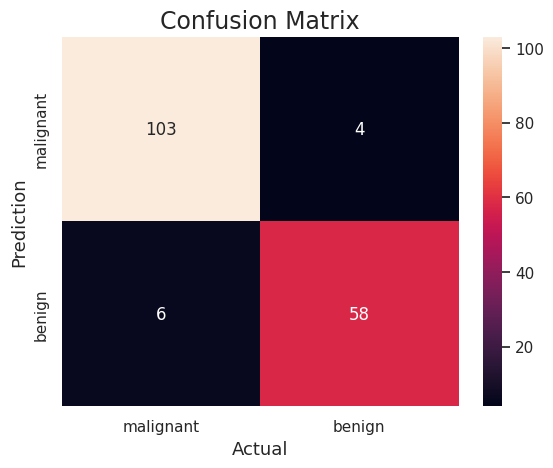

Accuracy   : 0.9415204678362573
Precision : 0.9354838709677419
Recall    : 0.90625
F1-score  : 0.9206349206349206


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#logistic regression confusion matrix

svc_cm = confusion_matrix(y_test, svc_model.predict(x_test))

svc_tp = svc_cm[0][0]

svc_tn = svc_cm[1][1]

svc_fn =  svc_cm[1][0]

svc_fp = svc_cm[0][1]

svc_accuracy = (svc_tp+ svc_tn)/ (svc_tp+ svc_tn + svc_fp + svc_fn)

print("SVC Confusion Matrix:")

print(svc_cm)

print("SVC Accuracy:", svc_accuracy)

sns.heatmap(svc_cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, svc_model.predict(x_test))
print("Accuracy   :", accuracy)
precision = precision_score(y_test, svc_model.predict(x_test))
print("Precision :", precision)
recall = recall_score(y_test, svc_model.predict(x_test))
print("Recall    :", recall)
F1_score = f1_score(y_test, svc_model.predict(x_test))
print("F1-score  :", F1_score)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

models = [logistic_model, decision_tree_model, random_forest_model,naive_bayes_model,svc_model]

for i, model in enumerate(models):

  print("Model: ",  model)

  y_pred = model.predict(x_test)

  print(classification_report(y_test, y_pred))

  print('Accuracy:', accuracy_score(y_test, y_pred))

  print()

Model:  LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9532163742690059

Model:  DecisionTreeClassifier(random_state=0)
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       107
           1       0.87      0.92      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171

Accuracy: 0.9181286549707602

Model:  RandomForestClassifier(random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       107
           1       0.90      0.97      0

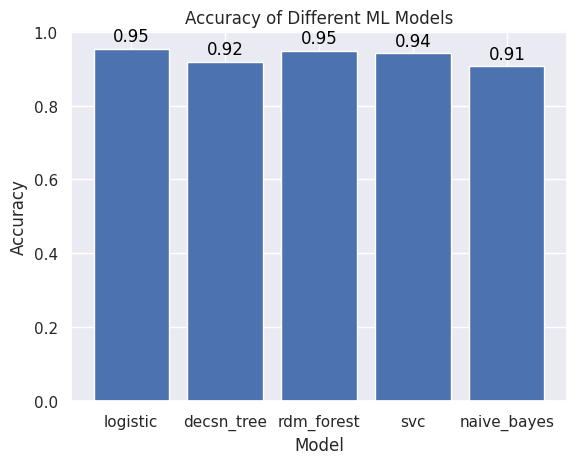

In [ ]:
#Bar graph


import matplotlib.pyplot as plt


model_names = ['logistic', 'decsn_tree', 'rdm_forest', 'svc', 'naive_bayes']
accuracies = [logistic_accuracy, decision_tree_accuracy, random_forest_accuracy, svc_accuracy, naive_bayes_accuracy]

# Create a bar plot
plt.bar(model_names, accuracies)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')


plt.show()